# Imports

In [1]:
using QSWalk
using PyPlot

# Simulation parametes

In [2]:
dim = 71;
steps = 10;


In [5]:
s0 = Int((dim+1)/2);

# Adjacency matrix

In [6]:
adjmtx = spdiagm((ones(dim-1),ones(dim-1)),(-1,1));

# Local interaction regime

In [7]:
ham = adjmtx;
lin = classical_lindblad_operators(adjmtx);
evo = global_operator(ham, lin);
init = proj(s0, dim);
time_step = 1.0;
time_points = collect(0:steps)*time_step;

In [8]:
res_class = evolve(evo, init, time_points);

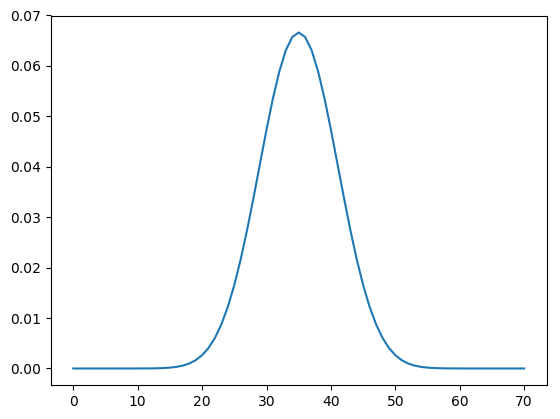

In [9]:
plot(diag(res_class[steps]));

# Global interaction regime

In [11]:
ham = adjmtx;
lin = [adjmtx];
omg = 0.0;
evo = global_operator(ham, lin, omg);
init = proj(s0, dim);
time_step = 1.0;
time_points = collect(0:steps)*time_step;

In [12]:
res_glob = evolve(evo, init, time_points);

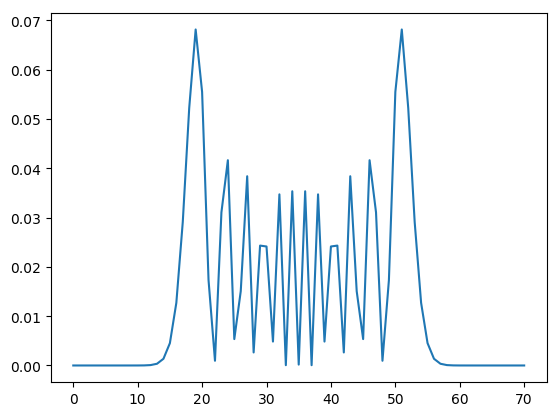

In [13]:
plot(diag(res_glob[steps]));

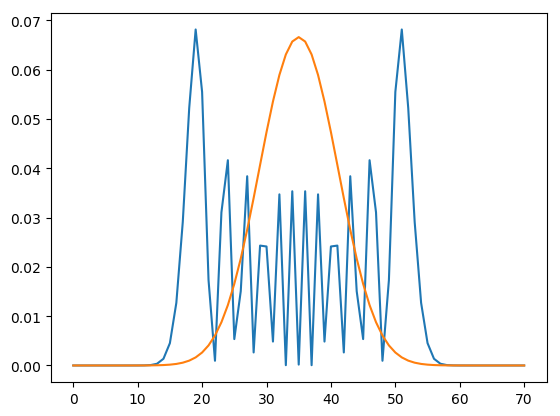

In [14]:
plot(diag(res_glob[steps])), plot(diag(res_class[steps]));

# Non-moralizing global interaction regime

In [18]:
ham = adjmtx;
lin = [adjmtx];
omg = 1.0; # different value of omega -> no Hamiltonian part
evo = global_operator(ham, lin, omg);
init = proj(s0, dim);
time_step = 1.0;
time_points = collect(0:steps)*time_step;

In [19]:
res_glob_lind = evolve(evo, init, time_points);

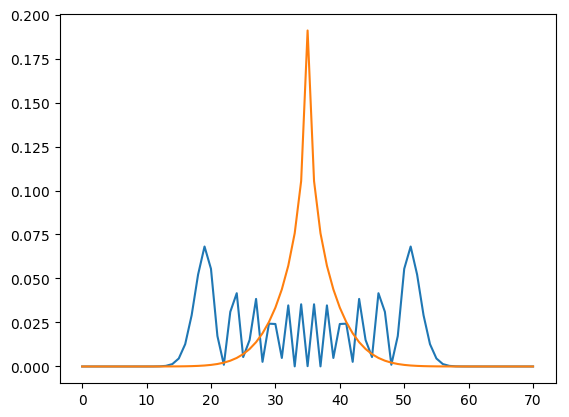

(PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7f55fda36470>], PyCall.PyObject[PyObject <matplotlib.lines.Line2D object at 0x7f55fda36668>])

In [20]:
plot(diag(res_glob[steps])), plot(diag(res_glob_lind[steps]))

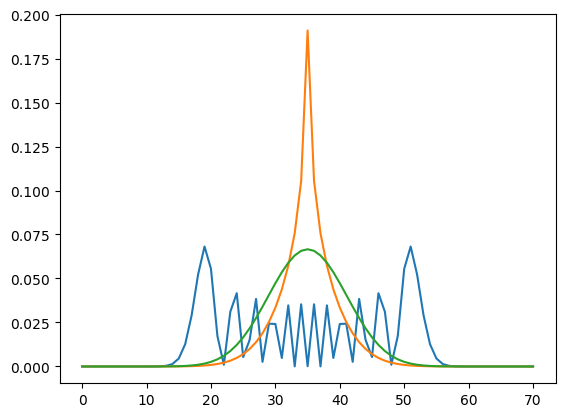

In [21]:
plot(diag(res_glob[steps])), plot(diag(res_glob_lind[steps])), plot(diag(res_class[steps]));